In [1]:
import numpy as np
from scipy import optimize 
# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

%matplotlib inline
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection, Line3DCollection
import ipywidgets as widgets

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
m = 1
v = 10 
e = 0.3
t0 = 0.4
t1 = 0.1
k = 0.4
w = 1

# We define the utility 

def utility(c, l, v, e):
    u = np.log(c) - v*((l**(1+(1/e)))/(1+(1/e)))
    return u

def budget(l, w, m, t0, t1, k):
    max_value = np.max(w*l-k,0)
    x = m + w*l - (t0*w*l + t1*max_value)
    return x


# We now define the objective function
def obj(l, w, e, t0, t1, k , v, m):
    c = budget(m = m, w = w, l = l, t0 = t0, t1 = t1, k = k )
    return -utility(l = l, c = c, e = e, v = v)

# We define the optimizer and find optimum 
def optimizer(w, e, v, t0, t1, k, m):
    sol = optimize.minimize_scalar(obj, method = 'bounded', bounds = (0,1), args = (w, e, v, t0, t1, k, m))
    l_best = sol.x
    c_best = budget(m = m, w = w, l = l_best, t0 = t0, t1 = t1, k = k)
    u_best = utility(l = l_best, c = c_best, e = e, v = v)

    return l_best, c_best, u_best

l_best, c_best, u_best = optimizer(w = w, e = e,v = v,t0 = t0,t1 = t1,k = k, m = m)

# f. print resultat
print(f'Optimal labour supply is {l_best:.3f}')
print(f'Optimal consumption is {c_best:.3f}')
print(f'maximized utility is {u_best:.3f}')

Optimal labour supply is 0.382
Optimal consumption is 1.231
maximized utility is 0.172


/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in log
  if sys.path[0] == '':


/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in log
  if sys.path[0] == '':


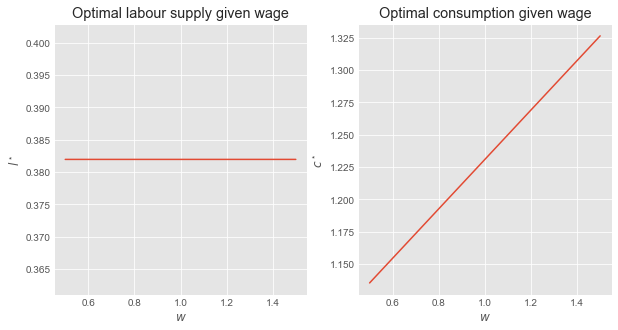

In [3]:
plt.style.use('ggplot')
N=10000
w_vec = np.linspace(0.5, 1.5, num=N)
#Create some empty list


l_opt = np.empty(N)
c_opt = np.empty(N)


for i,w in enumerate(w_vec):
    opt = optimizer(w,e,v,t0,t1,k,m)
    l_opt[i] = opt[0]
    c_opt[i] = opt[1]

# a. create a figure
fig = plt.figure(figsize=(10,5))

# c. left plot
ax_left = fig.add_subplot(1,2,1)

ax_left.plot(w_vec,l_opt)

ax_left.set_title('Optimal labour supply given wage')
ax_left.set_xlabel('$w$')
ax_left.set_ylabel('$l^\star$')
ax_left.grid(True)

# c. right plot
ax_right = fig.add_subplot(1,2,2)

ax_right.plot(w_vec,c_opt)

ax_right.set_title('Optimal consumption given wage')
ax_right.set_xlabel('$w$')
ax_right.set_ylabel('$c^\star$')
ax_right.grid(True)

plt.show()


In [4]:
#we'll now define a tax revenue function, which will reuse the values for w and l from above
def tax_revenue(w_vec,l_best,t0,t1,k):
    revenue = np.sum(t0*w_vec*l_best + t1*np.maximum(w_vec*l_best-k,0))
    return revenue

# Printing the value of the tax revenue
print(f'Sum of the tax revenue: {tax_revenue(w_vec,l_best,t0,t1,k):.2f}')

Sum of the tax revenue: 1567.02


In [10]:
e2 = 0.1

# We rename the empty tuples such that we do not overwrite the previous stated tuples
c_1_values=np.empty(N)
l_1_values=np.empty(N)
w_1_values=np.empty(N)

# Reusing code from question 2
def u_func(c,l):
    return np.log(c) - (v * (l**(1+1/e2))/(1+1/e2))

def value_of_choice(l,m,v,e2,t0,t1,k,w):
    c = m+w*l-(t0*w*l+t1*np.maximum(w*l-k,0))
    return -u_func(c,l)

for i,w in enumerate(np.linspace(0.5,1.5,10000)):

    solver = optimize.minimize_scalar(
        value_of_choice,method='bounded',
        bounds=(0,1),args=(m,v,e2,t0,t1,k,w))

    l = solver.x
    c = m+w*l-(t0*w*l+t1*np.maximum(w*l-k,0))

    c_1_values[i] = c
    l_1_values[i] = l
    w_1_values[i] = w

In [11]:
def tax_revenue_1(w_1_values,l_1_values,t0,t1,k):
    revenue = np.sum(t0*w_1_values*l_1_values + t1*np.maximum(w_1_values*l_1_values-k,0))
    return revenue

print(f'Sum of the tax revenue: {tax_revenue_1(w_1_values,l_1_values,t0,t1,k):.2f}')

Sum of the tax revenue: 3196.88
